# Exploratory Data Analysis for Top 50 US Tech Companies (2022 - 2023)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [40]:
df = pd.read_csv('top_us_company_data.csv')
df.drop_duplicates().dropna(inplace=True)
df.shape

(50, 10)

In [80]:
df.columns.str.replace(" ", "_").str.lower()
df.columns = ['company_name', 'industry', 'sector', 'hq_state', 'founding_year',
       'annual_revenue_2022-2023_(usd_in_billions)',
       'market_cap_(usd_in_trillions)', 'stock_name',
       'annual_income_tax_in_2022-2023_(usd_in_billions)', 'employee_size']

In [81]:
top_emp_size = df.groupby(['company_name'])['employee_size'].sum().reset_index()\
  .sort_values(by='employee_size', ascending=False).head(10)
top_emp_size

,company_name,employee_size
5,Amazon,1541000
23,IBM Corporation,345000
33,Microsoft Corporation,221000
4,Alphabet (Google),190234
7,Apple Inc.,164000
36,Oracle Corporation,143000
17,Dell Technologies Inc.,133000
25,Intel Corporation,131900
45,Tesla,127855
30,Meta Platforms,86482


### Which Companies have the highest amount of Employees?

Text(0.5, 1.0, 'Top 10 Companies with Highest Employee Count')

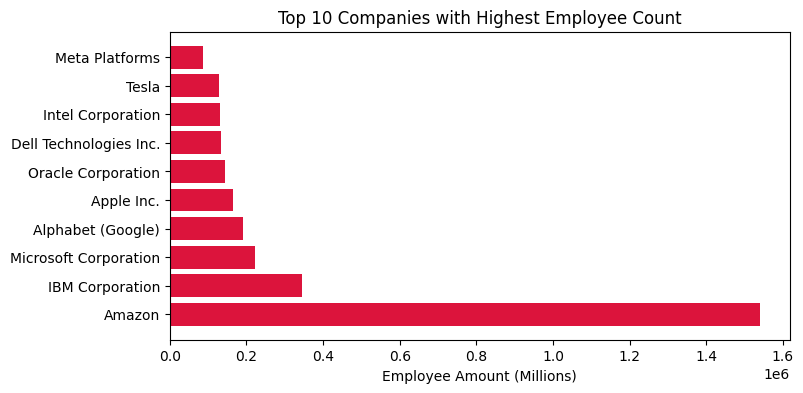

In [138]:
comp_name = top_emp_size['company_name']
comp_size = top_emp_size['employee_size']

plt.figure(figsize=(8,4))

plt.barh(comp_name,comp_size, color='crimson')
plt.xlabel("Employee Amount (Millions)")
plt.title("Top 10 Companies with Highest Employee Count")

In [70]:
df.head()

,company_name,industry,sector,hq_state,founding_year,annual_revenue_2022-2023_(usd_in_billions),market_cap_(usd_in_trillions),stock_name,annual_income_tax_in_2022-2023_(usd_in_billions),employee_size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473


### Which companies have the highest Market Cap?

In [88]:
mark_cap = df.groupby(['company_name'])['market_cap_(usd_in_trillions)'].max().reset_index()\
             .sort_values(by='market_cap_(usd_in_trillions)', ascending=False).head(10).reset_index(drop=True)
mark_cap

,company_name,market_cap_(usd_in_trillions)
0,Apple Inc.,2.520
1,Microsoft Corporation,2.037
2,Alphabet (Google),1.350
3,Amazon,1.030
4,NVIDIA Corporation,0.653
5,Tesla,0.625
6,Meta Platforms,0.524
7,Broadcom Inc.,0.266
8,Oracle Corporation,0.236
9,Cisco Systems Inc.,0.208


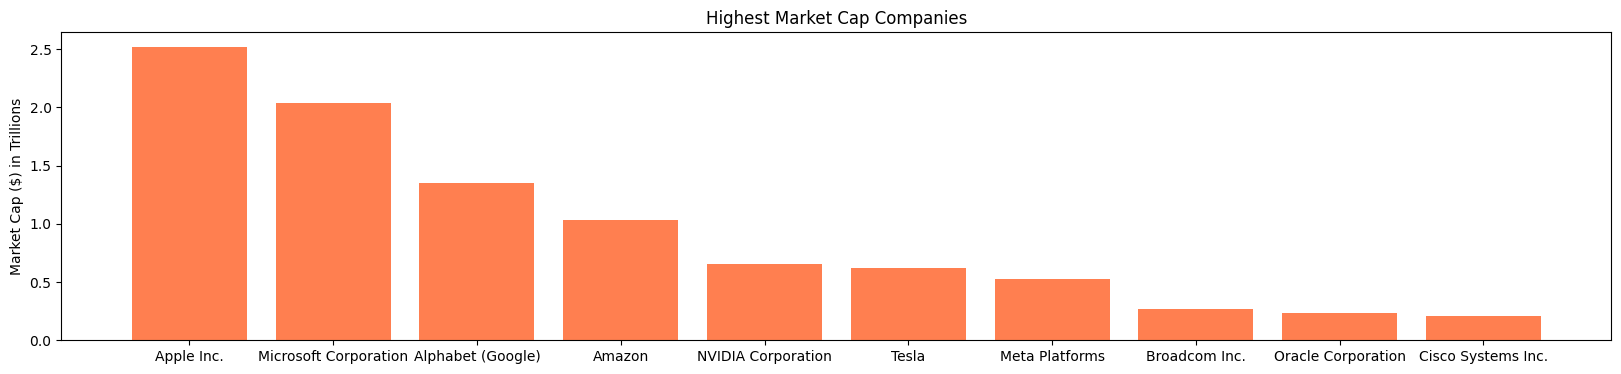

In [137]:
com_name = mark_cap['company_name']
com_cap = mark_cap['market_cap_(usd_in_trillions)']

plt.figure(figsize=(20,4))

plt.bar(com_name, com_cap, color='coral')
plt.ylabel("Market Cap ($) in Trillions")
plt.title("Highest Market Cap Companies")
plt.show()

In [97]:
df.head()

,company_name,industry,sector,hq_state,founding_year,annual_revenue_2022-2023_(usd_in_billions),market_cap_(usd_in_trillions),stock_name,annual_income_tax_in_2022-2023_(usd_in_billions),employee_size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473


In [101]:
rev_comp = df.groupby(['stock_name'])['annual_revenue_2022-2023_(usd_in_billions)'].max().reset_index()\
             .sort_values(by='annual_revenue_2022-2023_(usd_in_billions)', ascending=False).reset_index(drop=True).head(10)

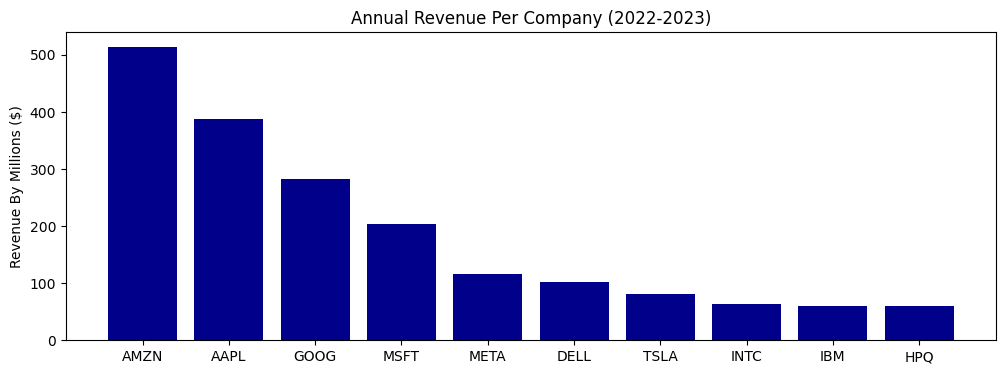

In [228]:
rev_name = rev_comp['stock_name']
rev_revenue = rev_comp['annual_revenue_2022-2023_(usd_in_billions)']

plt.figure(figsize=(12,4))

plt.bar(rev_name, rev_revenue, color='darkblue')
plt.title("Annual Revenue Per Company (2022-2023)")
plt.ylabel("Revenue By Millions ($)")
plt.show()

### Does the year founded make a company more successful?


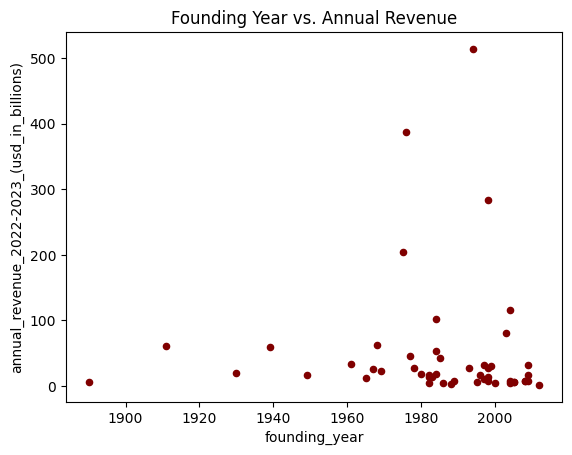

In [147]:
df.plot(kind='scatter',
         x='founding_year',
         y='annual_revenue_2022-2023_(usd_in_billions)',
         title='Founding Year vs. Annual Revenue',
         color='maroon')
plt.show()

### Which Company pays the most income tax?

In [160]:
comp_tax = df.groupby(['stock_name'])['annual_income_tax_in_2022-2023_(usd_in_billions)'].max().reset_index()\
  .sort_values(by='annual_income_tax_in_2022-2023_(usd_in_billions)', ascending=False).head(10).reset_index(drop=True)
comp_tax

,stock_name,annual_income_tax_in_2022-2023_(usd_in_billions)
0,AAPL,18.314
1,MSFT,15.139
2,GOOG,11.356
3,META,5.619
4,CSCO,2.665
5,QCOM,2.012
6,TXN,1.283
7,ADBE,1.252
8,HPQ,1.238
9,TSLA,1.132


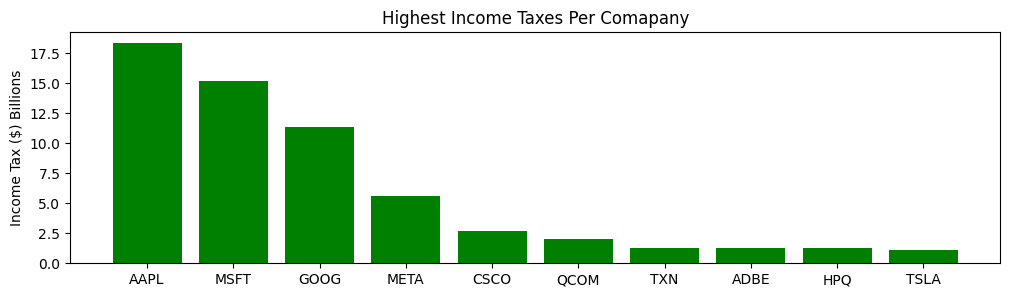

In [170]:
comp_names = comp_tax['stock_name']
comp_taxes = comp_tax['annual_income_tax_in_2022-2023_(usd_in_billions)']

plt.figure(figsize=(12,3))

plt.bar(comp_names, comp_taxes, color = 'green')
plt.title("Highest Income Taxes Per Comapany")
plt.ylabel("Income Tax ($) Billions")
plt.show()

In [172]:
df.head()

,company_name,industry,sector,hq_state,founding_year,annual_revenue_2022-2023_(usd_in_billions),market_cap_(usd_in_trillions),stock_name,annual_income_tax_in_2022-2023_(usd_in_billions),employee_size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473


### Where are most of these companies located?

In [188]:
comp_loc = df.groupby(['hq_state'])['stock_name'].count().reset_index()\
             .sort_values(by='stock_name', ascending=False).head(10)
comp_loc

,hq_state,stock_name
1,California,33
10,Texas,4
8,New York,2
11,Washington,2
0,Arizona,1
2,Connecticut,1
3,Florida,1
4,Idaho,1
5,Massachusetts,1
6,Montana,1


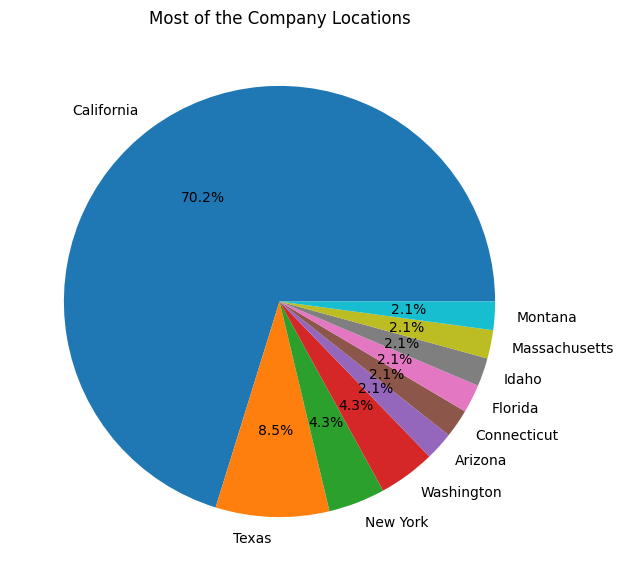

In [215]:
hq = comp_loc['hq_state']
comp_name1 = comp_loc['stock_name']

plt.figure(figsize=(12,7))

plt.pie(comp_name1, labels=hq, autopct='%1.1f%%')
plt.title("Most of the Company Locations")
plt.show()

### Which state has the highest annual income tax?

In [208]:
state_tax = df.groupby(['hq_state'])['annual_income_tax_in_2022-2023_(usd_in_billions)'].max().reset_index()\
              .sort_values(by='annual_income_tax_in_2022-2023_(usd_in_billions)', ascending=False).reset_index(drop=True).head(8)
state_tax

,hq_state,annual_income_tax_in_2022-2023_(usd_in_billions)
0,California,18.314
1,Washington,15.139
2,Texas,1.283
3,Idaho,0.888
4,Connecticut,0.865
5,New Jersey,0.855
6,Wisconsin,0.551
7,Massachusetts,0.350


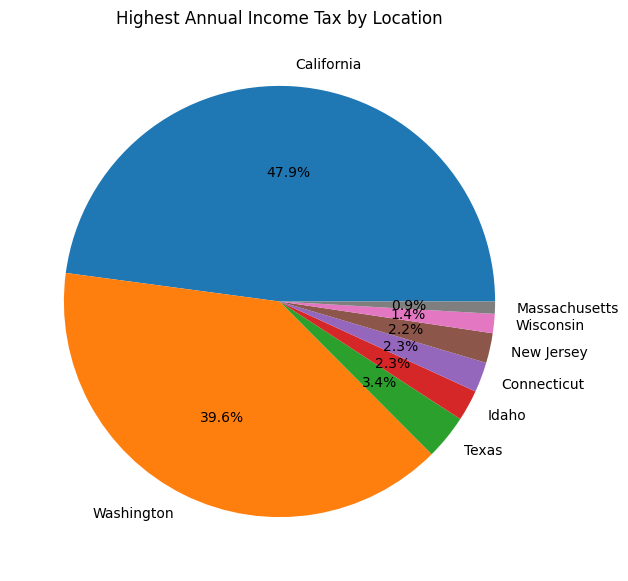

In [214]:
hq_tax = state_tax['hq_state']
ann_tax = state_tax['annual_income_tax_in_2022-2023_(usd_in_billions)']

plt.figure(figsize=(12,7))

plt.pie(ann_tax, labels=hq_tax, autopct='%1.1f%%')
plt.title("Highest Annual Income Tax by Location")
plt.show()

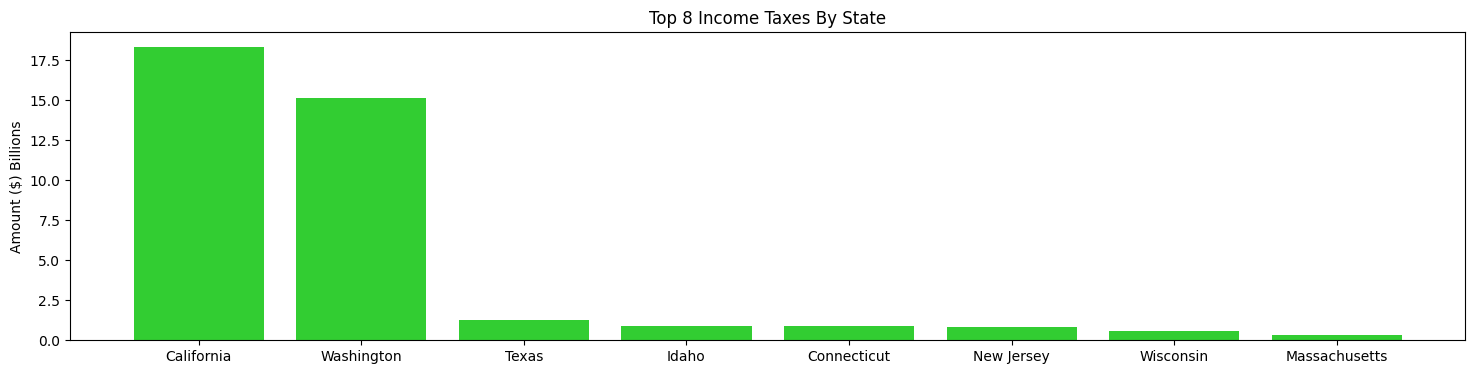

In [230]:
## showing taxes per state as a bar chart as well

plt.figure(figsize=(18,4))

plt.bar(hq_tax, ann_tax, color='limegreen')
plt.title("Top 8 Income Taxes By State")
plt.ylabel("Amount ($) Billions")
plt.show()


### Which Sector has the highest Revenue?

In [245]:
sector_revenue = df.groupby(['sector'])['annual_revenue_2022-2023_(usd_in_billions)'].max().reset_index()\
                   .sort_values(by='annual_revenue_2022-2023_(usd_in_billions)', ascending=False)
sector_revenue

,sector,annual_revenue_2022-2023_(usd_in_billions)
6,Software Application,513.98
2,Consumer Electronics,387.53
7,Software Infrastructure,282.83
1,Computer Hardware,102.30
5,Semiconductors,63.05
4,IT Services,60.52
0,Communication Equipments,53.16
3,Electronic Components,5.61


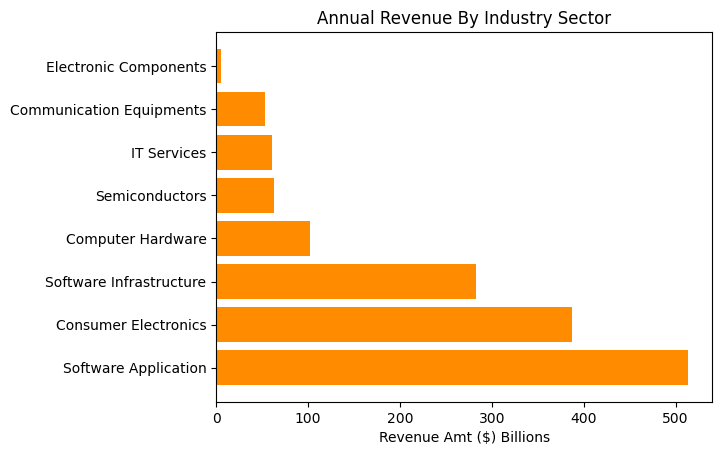

In [243]:
sector_rev = sector_revenue['sector']
sector_rev1 = sector_revenue['annual_revenue_2022-2023_(usd_in_billions)']

plt.barh(sector_rev, sector_rev1, color='darkorange')
plt.title("Annual Revenue By Industry Sector")
plt.xlabel("Revenue Amt ($) Billions")
plt.show()